## Equação de onda de segunda ordem numa grelha de Chebyshev (1D)

Resolvemos
$$u_{tt}=u_{xx},\;\;\;\; -1<x<1,\;\;t>0$$
com
$u=0$ na fronteira
e condições iniciais:
$$u(x,0)=e^{-40((x-0.4)^2)},\;\;u_t(x,0)=0$$

(Código baseado no do livro de L. Trefthen, _Spectral Methods with Matlab_.
Usa pacote chebfftPy.)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from chebfftPy import chebfft
from numpy import arange,cos,zeros,round,exp,pi
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.pyplot import figure

In [2]:
from numpy import pi,cos,arange,array, flipud,\
     real,zeros, sqrt
from numpy.fft import fft
from numpy.fft import ifft

def chebfft(v):
    '''Chebyshev differentiation via fft. p19.m
       Ref.: Trefethen's 'Spectral Methods in MATLAB' book.
       Code translation by: Praveen Chandrashekar
       (http://cpraveen.github.io/teaching/chebpy.html)
    '''
    N = len(v)-1
    if N == 0:
        w = 0.0 # only when N is even!
        return w
    x  = cos(pi*arange(0,N+1)/N)
    ii = arange(0,N)
    V = flipud(v[1:N]); V = list(v) + list(V);
    U = real(fft(V))
    b = list(ii); b.append(0); b = b + list(arange(1-N,0));
    w_hat = 1j*array(b)
    w_hat = w_hat * U
    W = real(ifft(w_hat))
    w = zeros(N+1)
    w[1:N] = -W[1:N]/sqrt(1-x[1:N]**2)
    w[0] = sum(ii**2*U[ii])/N + 0.5*N*U[N]
    w[N] = sum((-1)**(ii+1)*ii**2*U[ii])/N + \
              0.5*(-1)**(N+1)*N*U[N]
    return w

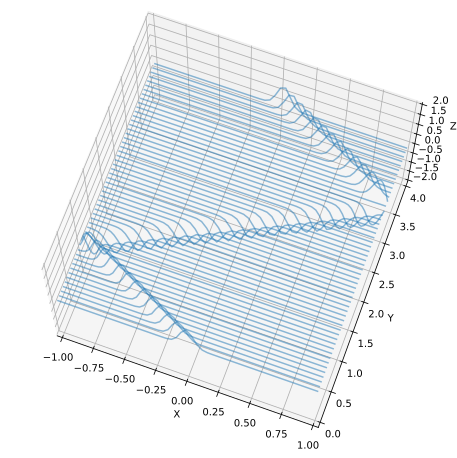

In [3]:
# Time-stepping by Leap Frog Formula:
N      = 80
t      = 0.0
x      = cos(pi*arange(0,N+1)/N)
dt     = 8.0/(N**2)
v      = exp(-200*x**2)
vold   = exp(-200*(x-dt)**2)
tmax   = 4
tplot  = 0.075
plotgap = int(round(tplot/dt))
dt     = tplot/plotgap
nplots = int(round(tmax/tplot))
plotdata = []
plotdata.append(list(zip(x,v)))
tdata  = zeros(nplots+1)
for i in range(1,nplots+1):
    for n in range(plotgap):
        t    = t + dt
        w    = chebfft(chebfft(v))
        w[0] = 0.0
        w[N] = 0.0 
        vnew = 2*v - vold + dt**2*w
        vold = v
        v    = vnew
    plotdata.append(list(zip(x,v)))
    tdata[i] = t

fig  = figure(figsize=(10,8))
ax  = fig.add_subplot(1,1,1,projection ='3d')
poly = LineCollection(plotdata)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('X')
ax.set_xlim3d(-1, 1)
ax.set_ylabel('Y')
ax.set_ylim3d(0, tmax)
ax.set_zlabel('Z')
ax.set_zlim3d(-2, 2)
ax.view_init(70,-70)

Ref.: L. Trefthen, _Spectral Methods with Matlab_.